In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#  El Índice Oceánico de El Niño (ONI en inglés)

## Descargar los datos de internet

Página web: http://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_v5.php

Datos: https://www.esrl.noaa.gov/psd/data/correlation/oni.data

### Uso de pandas para descargar los datos de Internet

In [23]:
oni = pd.read_csv("https://www.esrl.noaa.gov/psd/data/correlation/oni.data", skiprows=1, 
                  skipfooter=8, header=None, delim_whitespace=True, engine="python")
#oni.to_csv("./data/oni.txt", index=False)
oni.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1950,-1.53,-1.34,-1.16,-1.18,-1.07,-0.85,-0.54,-0.42,-0.39,-0.44,-0.60,-0.80
1,1951,-0.82,-0.54,-0.17,0.18,0.36,0.58,0.70,0.89,0.99,1.15,1.04,0.81
2,1952,0.53,0.37,0.34,0.29,0.20,0.00,-0.08,0.00,0.15,0.10,0.04,0.15
3,1953,0.40,0.60,0.63,0.66,0.75,0.77,0.75,0.73,0.78,0.84,0.84,0.81
4,1954,0.76,0.47,-0.05,-0.41,-0.54,-0.50,-0.64,-0.84,-0.90,-0.77,-0.73,-0.66


In case you do not have an internet connection the ONI data set is stored in the folder `./data/oni.txt`

In [3]:
oni = pd.read_csv("./data/oni.txt")
oni.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12
66,2016,2.53,2.23,1.68,1.03,0.48,-0.00,-0.34,-0.57,-0.68,-0.74,-0.71,-0.56
67,2017,-0.29,-0.06,0.15,0.29,0.39,0.38,0.16,-0.14,-0.44,-0.70,-0.88,-0.97
68,2018,-0.87,-0.76,-0.60,-0.41,-0.13,0.06,0.11,0.20,0.43,0.70,0.85,0.81
69,2019,0.80,0.82,0.81,0.75,0.63,0.52,0.30,0.11,0.13,0.29,0.46,0.55
70,2020,0.54,0.57,0.49,0.27,-0.01,-0.23,-99.90,-99.90,-99.90,-99.90,-99.90,-99.90


## Limpieza de datos

In [4]:
oni = oni.replace(-99.90, np.nan)
oni.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12
66,2016,2.53,2.23,1.68,1.03,0.48,-0.00,-0.34,-0.57,-0.68,-0.74,-0.71,-0.56
67,2017,-0.29,-0.06,0.15,0.29,0.39,0.38,0.16,-0.14,-0.44,-0.70,-0.88,-0.97
68,2018,-0.87,-0.76,-0.60,-0.41,-0.13,0.06,0.11,0.20,0.43,0.70,0.85,0.81
69,2019,0.80,0.82,0.81,0.75,0.63,0.52,0.30,0.11,0.13,0.29,0.46,0.55
70,2020,0.54,0.57,0.49,0.27,-0.01,-0.23,NaN,NaN,NaN,NaN,NaN,NaN


## Formato ancho a largo

In [15]:
oni_melted = pd.melt(oni, id_vars="0", value_name="ONI", var_name="Mes")
oni_melted.tail()

,0,Mes,ONI
847,2016,12,-0.56
848,2017,12,-0.97
849,2018,12,0.81
850,2019,12,0.55
851,2020,12,NaN


## Añadir columna de fecha

In [20]:
oni_melted["Fecha"] = oni_melted.apply(lambda x: pd.to_datetime(str(x[0]) +"-"+ str(x["Mes"])).to_period("M"), axis=1)
oni_melted.head()

,0,Mes,ONI,Fecha
0,1950,1,-1.53,1950-01
1,1951,1,-0.82,1951-01
2,1952,1,0.53,1952-01
3,1953,1,0.40,1953-01
4,1954,1,0.76,1954-01


## Subconjunto del conjunto de datos

In [42]:
oni_rev = oni_melted[["Fecha", "ONI"]].sort_values("Fecha").set_index("Fecha")
oni_rev.head()

,ONI
Fecha,
1950-01,-1.53
1950-02,-1.34
1950-03,-1.16
1950-04,-1.18
1950-05,-1.07


In [43]:
oni = oni_rev["2010":"2020"]
oni

,ONI
Fecha,
2010-01,1.55
2010-02,1.31
2010-03,0.94
2010-04,0.44
2010-05,-0.09
...,...
2020-08,NaN
2020-09,NaN
2020-10,NaN


## Trazar los datos

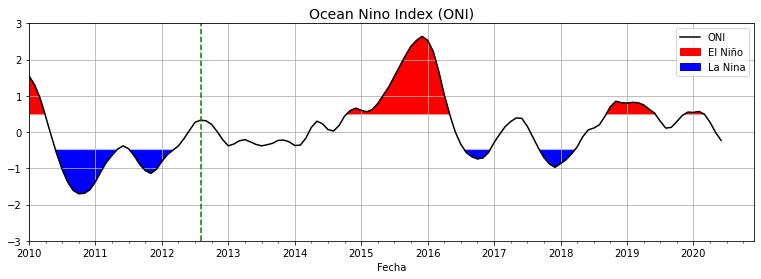

In [52]:
fig, ax = plt.subplots(figsize=(13,4))
oni.plot(ax=ax, color="k")
ax.fill_between(oni.index, 0.5, oni.ONI, where=oni.ONI >= 0.5, color="red", label="El Niño", interpolate=True)
ax.fill_between(oni.index, -0.5, oni.ONI, where=oni.ONI <= -0.5, color="blue", label="La Nina", interpolate=True)
ax.grid()
ax.legend()
ax.set_ylim(-3,3)
ax.set_title("Ocean Nino Index (ONI)", size=14)
ax.axvline("2012-8", color="green", linestyle="dashed");

## Refactorización del código

In [54]:
# %load src/oni_plot.py
def plot_oni(df, min_max = None, vline=None, ax=None):
    
    import pandas as pd
    import matplotlib.pyplot as plt
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(13,4))
    
    oni_melted = pd.melt(df, id_vars="0", value_name="ONI", var_name="Month")
    oni_melted["Date"] = oni_melted.apply(lambda x: pd.to_datetime(str(x[0]) +"-"+ str(x["Month"])).to_period("M"), axis=1)
    oni = oni_melted[["Date", "ONI"]].sort_values("Date").reset_index(drop=True).set_index("Date")
    if min_max is not None:
        oni = oni[str(min_max[0]):str(min_max[1])]        

    oni.plot(ax=ax, color="k")
    ax.fill_between(oni.index, 0.5, oni.ONI, where=oni.ONI >= 0.5,color="red", label="El Nino", interpolate=True)
    ax.fill_between(oni.index, -0.5, oni.ONI, where=oni.ONI <= -0.5,color="blue", label="La Nina", interpolate=True)
    ax.grid()
    ax.legend()
    ax.set_ylim(-3,3)
    ax.set_title("Ocean Nino Index (ONI)", size=14)
    
    if vline is not None:
        ax.axvline(str(vline), color="green", linestyle="dashed");
        

In [55]:
oni = pd.read_csv("./data/oni.txt")
#oni

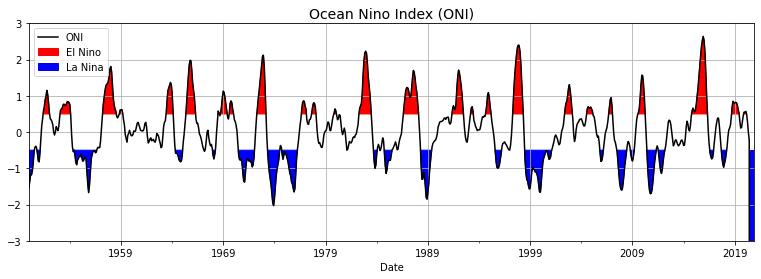

In [56]:
oni = pd.read_csv("./data/oni.txt")
plot_oni(oni)

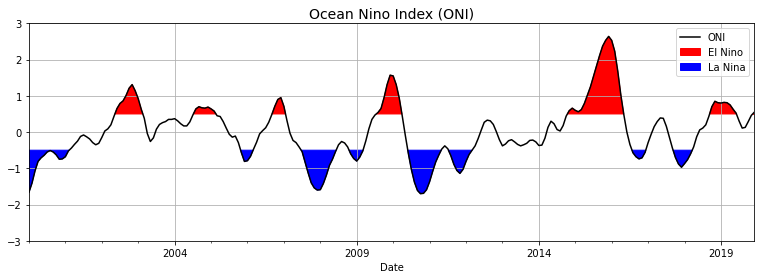

In [61]:
plot_oni(oni, min_max = [2000, 2019])

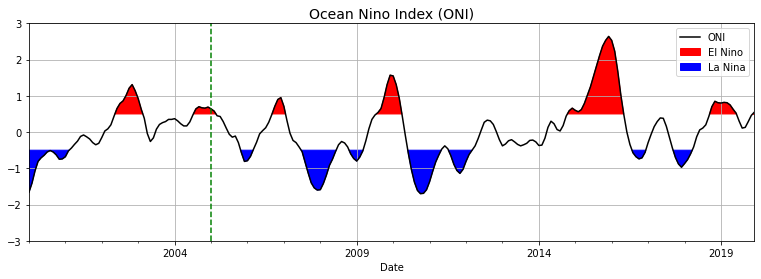

In [62]:
plot_oni(oni, min_max = [2000, 2019], vline="2005-1")